In [1]:
In [1]:  # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Generate Cities List
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [3]:
# Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it's being processed (with the city number and city name).

In [58]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}
temperature_fahrenheit = []
humidity = []
cloudy = []
wind_speed = []
lat = []
lng = []
city_nums = []
city_names = []
city_country = []
city_datetime = []
city_name = ""
city_num = ""


# Build partial query URL
for city in cities:
    query_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    response = requests.get(query_url).json()

    try:
        humidity.append(response["main"]["humidity"])
        temperature_fahrenheit.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        cloudy.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_nums.append(response["id"])
        city_names.append(response["name"])
        city_country.append(response["sys"]["country"])
        city_datetime.append(response["dt"])
        city_num = response["id"]
        city_name = response["name"]
        
    except (KeyError):
        print("Missing field/result... skipping.")
    print(f"Processing weather data for {city_name}, city number: {city_num}")

Processing weather data for Ushuaia, city number: 3833367
Missing field/result... skipping.
Processing weather data for Ushuaia, city number: 3833367
Missing field/result... skipping.
Processing weather data for Ushuaia, city number: 3833367
Processing weather data for Ponta do Sol, city number: 2264557
Processing weather data for Talara, city number: 3691582
Processing weather data for Piedras, city number: 3672290
Processing weather data for Plettenberg Bay, city number: 964712
Processing weather data for Seddon, city number: 7281807
Processing weather data for Sitka, city number: 5557293
Missing field/result... skipping.
Processing weather data for Sitka, city number: 5557293
Processing weather data for Rikitea, city number: 4030556
Missing field/result... skipping.
Processing weather data for Rikitea, city number: 4030556
Processing weather data for Rabo de Peixe, city number: 3372745
Processing weather data for Tasiilaq, city number: 3424607
Processing weather data for Jamestown, 

In [5]:
# Convert Raw Data to DataFrame
# Export the city data into a .csv.
# Display the DataFrame

In [6]:
city_data_df = {"city_id": city_nums, "city": city_names, "country":city_country,
               "date_time":city_datetime ,
               "latitude": lat, "longitude": lng, "temperature (F)": temperature_fahrenheit, 
               "humidity (%)": humidity,
               "cloudiness (%)": cloudy, "wind speed (mph)": wind_speed,
              }
city_data_df = pd.DataFrame(city_data_df)

city_data_df.head()   

,city_id,city,country,date_time,latitude,longitude,temperature (F),humidity (%),cloudiness (%),wind speed (mph)
0,3833367,Ushuaia,AR,1597379478,-54.80,-68.30,30.20,92,75,5.82
1,2264557,Ponta do Sol,PT,1597379675,32.67,-17.10,71.60,68,40,11.41
2,3691582,Talara,PE,1597379656,-4.58,-81.27,63.45,87,64,14.47
3,3672290,Piedras,CO,1597380065,4.54,-74.88,77.00,74,100,0.60
4,964712,Plettenberg Bay,ZA,1597380065,-34.05,23.37,49.98,74,2,4.72


In [8]:
# city_data_df = city_data_df.loc[city_data_df["humidity (%)"] > 100.0]
# city_data_df.head()
# No city with humidity over 100%

In [11]:
# Extract relevant fields from the data frame
city_data_df.to_csv('city_data_adam.csv', index=False)

# Export the city_data into a csv
city_data_df.head()

,city_id,city,country,date_time,latitude,longitude,temperature (F),humidity (%),cloudiness (%),wind speed (mph)
0,3833367,Ushuaia,AR,1597379478,-54.80,-68.30,30.20,92,75,5.82
1,2264557,Ponta do Sol,PT,1597379675,32.67,-17.10,71.60,68,40,11.41
2,3691582,Talara,PE,1597379656,-4.58,-81.27,63.45,87,64,14.47
3,3672290,Piedras,CO,1597380065,4.54,-74.88,77.00,74,100,0.60
4,964712,Plettenberg Bay,ZA,1597380065,-34.05,23.37,49.98,74,2,4.72


In [ ]:
# Plotting the Data
# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# Save the plotted figures as .pngs.

In [ ]:
Latitude vs. Temperature Plot

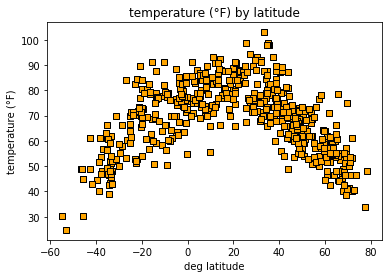

In [26]:
plt.scatter(city_data_df["latitude"], city_data_df["temperature (F)"],marker="s", facecolors="orange", edgecolors="black")
plt.figuresize = (50,50)
plt.ylabel('temperature (°F)')
plt.xlabel('deg latitude')
plt.title(f"temperature (°F) by latitude")
plt.savefig('latitudevstemperature.png')

In [17]:
# As you get closer to the equator the temperature rises. Similarly as you move further from the equator temperature decreases.

In [ ]:
Latitude vs. Humidity Plot

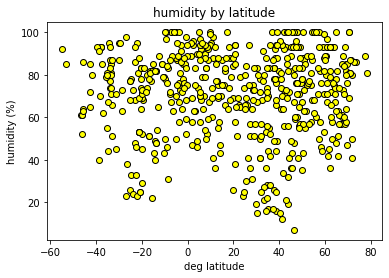

In [28]:
plt.scatter(city_data_df["latitude"], city_data_df["humidity (%)"],marker="o", facecolors="yellow", edgecolors="black")
plt.figuresize = (50,50)
plt.ylabel('humidity (%)')
plt.xlabel('deg latitude')
plt.title(f"humidity by latitude")
plt.savefig('latitudevshumidity.png')

In [29]:
# Higher Humidity areas generally are north of the equator

In [ ]:
Latitude vs. Cloudiness Plot

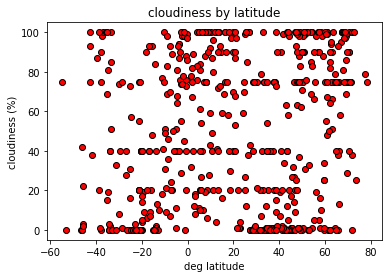

In [31]:
plt.scatter(city_data_df["latitude"], city_data_df["cloudiness (%)"],marker="o", facecolors="red", edgecolors="black")
plt.figuresize = (50,50)
plt.ylabel('cloudiness (%)')
plt.xlabel('deg latitude')
plt.title(f"cloudiness by latitude")
plt.savefig('latitudevscloudiness.png')

In [32]:
# There is no relationship between cloudiness and latitude

In [ ]:
Latitude vs. Wind Speed Plot

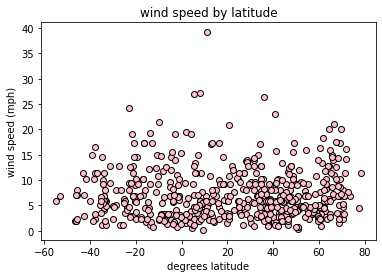

In [33]:
plt.scatter(city_data_df["latitude"], city_data_df["wind speed (mph)"],marker="o", facecolors="pink", edgecolors="black")
plt.figuresize = (50,50)
plt.ylabel('wind speed (mph)')
plt.xlabel('degrees latitude')
plt.title(f"wind speed by latitude")
plt.savefig('latitudevswind.png')

In [34]:
# Wind Speed is evenly distributed across latitudes

In [36]:
# OPTIONAL: Create a function to create Linear Regression plots
def reg_plot(x_values, y_values, x_title, y_title, hemisphere):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(f"{hemisphere} {x_title} vs {y_title}")
    plt.savefig(f'{hemisphere} {x_title} vs {y_title}.png')
    plt.show()
    print(line_eq)

In [38]:
# Create Northern and Southern Hemisphere DataFrames
city_data_north_df = city_data_df.loc[city_data_df["latitude"] > 0]
city_data_south_df = city_data_df.loc[city_data_df["latitude"] < 0]

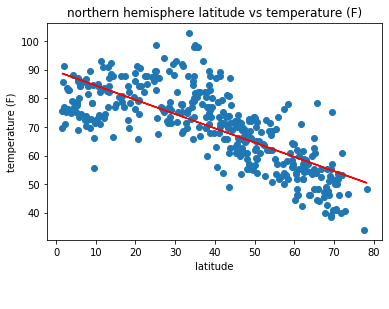

y = -0.5x + 89.52


In [42]:
reg_plot(city_data_north_df["latitude"], city_data_north_df["temperature (F)"], "latitude", "temperature (F)", "northern hemisphere")

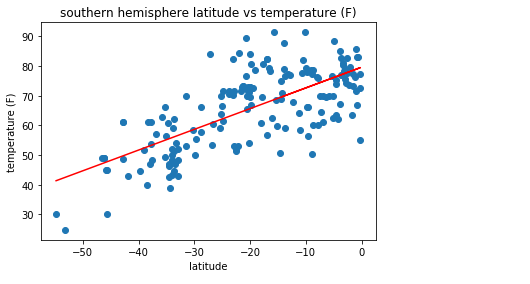

y = 0.7x + 79.65


In [43]:
reg_plot(city_data_south_df["latitude"], city_data_south_df["temperature (F)"], "latitude", "temperature (F)", "southern hemisphere")

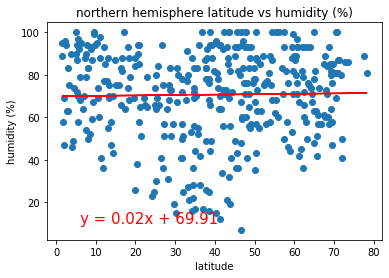

y = 0.02x + 69.91


In [44]:
reg_plot(city_data_north_df["latitude"], city_data_north_df["humidity (%)"], "latitude", "humidity (%)", "northern hemisphere")

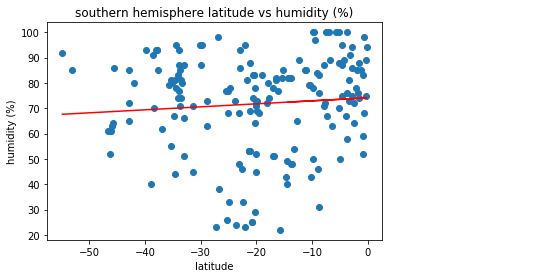

y = 0.12x + 74.13


In [45]:
reg_plot(city_data_south_df["latitude"], city_data_south_df["humidity (%)"], "latitude", "humidity (%)", "southern hemisphere")

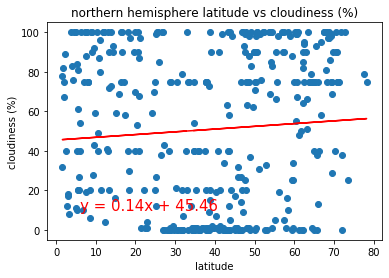

y = 0.14x + 45.46


In [49]:
reg_plot(city_data_north_df["latitude"], city_data_north_df["cloudiness (%)"], "latitude", "cloudiness (%)", "northern hemisphere")

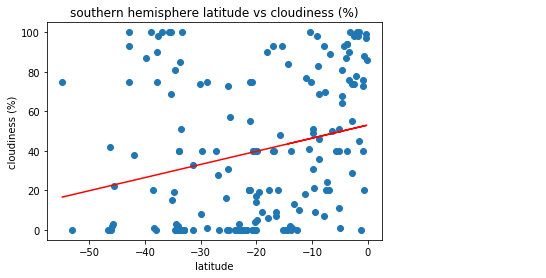

y = 0.67x + 53.07


In [50]:
reg_plot(city_data_south_df["latitude"], city_data_south_df["cloudiness (%)"], "latitude", "cloudiness (%)", "southern hemisphere")

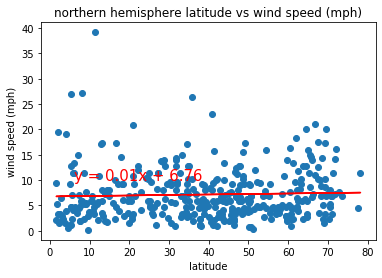

y = 0.01x + 6.76


In [52]:
reg_plot(city_data_north_df["latitude"], city_data_north_df["wind speed (mph)"], "latitude", "wind speed (mph)", "northern hemisphere")

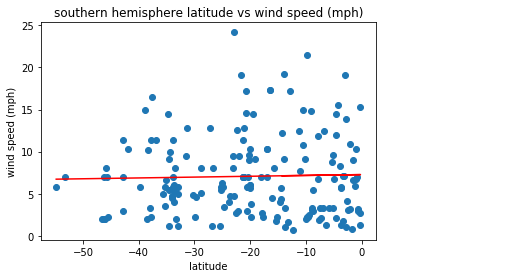

y = 0.01x + 7.27


In [51]:
reg_plot(city_data_south_df["latitude"], city_data_south_df["wind speed (mph)"], "latitude", "wind speed (mph)", "southern hemisphere")

In [57]:
### Adam's Findings ###

# 1. There is strong correlation between temperature and latitude
# 2. There is not significant correlation between wind speed and latitude
# 3. There is not significant correlation between cloudiness and latitude